### __Build a Basic neural network from scratch using a high level library like Pytorch. Use appropriate dataset__

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [31]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [32]:
x_train=x_train/255.0
x_test=x_test/255.0

In [33]:
x_train=torch.Tensor(x_train).unsqueeze(1)
x_test=torch.Tensor(x_test).unsqueeze(1)

In [34]:
y_train=torch.Tensor(y_train).long()
y_test=torch.Tensor(y_test).long()

In [35]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN,self).__init__()
        self.fc1=nn.Linear(28*28,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,10)
    def forward(self,x):
        x=x.view(-1,28*28)
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)

        return x

model=SimpleNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [39]:
epochs=10
for epoch in range(epochs):
    running_loss=0.0
    optimizer.zero_grad()
    outputs=model(x_train)
    loss=criterion(outputs,y_train)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print(f'{epoch+1} loss: {running_loss} ')

1 loss: 1.2665939331054688 
2 loss: 1.1966863870620728 
3 loss: 1.1290485858917236 
4 loss: 1.0643104314804077 
5 loss: 1.003013253211975 
6 loss: 0.9455412030220032 
7 loss: 0.8920848369598389 
8 loss: 0.8426545858383179 
9 loss: 0.7971722483634949 
10 loss: 0.7555156350135803 


In [40]:
correct = 0
total = 0
with torch.no_grad():
    outputs = model(x_test)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    correct += (predicted == y_test).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

Accuracy of the model on the test set: 83.99%


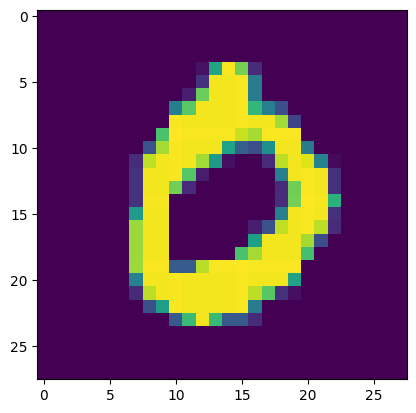

Predicted Label: 0


In [42]:
image = x_test[3].squeeze().numpy()
plt.imshow(image)
plt.show()
image = image.reshape(1, 28*28)
image = torch.Tensor(image)
output = model(image)
_, predicted_label = torch.max(output.data, 1)
print(f"Predicted Label: {predicted_label.item()}")

In [49]:
###Regression
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [50]:
df = sns.load_dataset('iris')
df.head()

x = df.drop(columns=['sepal_length'])
y = df['sepal_length']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

le = LabelEncoder()
x_train['species'] = le.fit_transform(x_train['species'])
x_test['species'] = le.transform(x_test['species'])

In [51]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [52]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(x_train_tensor.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RegressionModel()
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [53]:
epochs = 25
for epoch in range(epochs):
    model.train()
    predictions = model(x_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/25], Loss: 34.1065
Epoch [2/25], Loss: 164.3296
Epoch [3/25], Loss: 21.0465
Epoch [4/25], Loss: 34.9284
Epoch [5/25], Loss: 32.1382
Epoch [6/25], Loss: 29.4913
Epoch [7/25], Loss: 27.6675
Epoch [8/25], Loss: 25.1682
Epoch [9/25], Loss: 21.5274
Epoch [10/25], Loss: 15.3849
Epoch [11/25], Loss: 5.9632
Epoch [12/25], Loss: 0.4890
Epoch [13/25], Loss: 13.4995
Epoch [14/25], Loss: 6.7615
Epoch [15/25], Loss: 0.2791
Epoch [16/25], Loss: 2.7394
Epoch [17/25], Loss: 5.0727
Epoch [18/25], Loss: 4.8759
Epoch [19/25], Loss: 2.9570
Epoch [20/25], Loss: 1.0069
Epoch [21/25], Loss: 0.7022
Epoch [22/25], Loss: 2.0150
Epoch [23/25], Loss: 2.6519
Epoch [24/25], Loss: 1.5803
Epoch [25/25], Loss: 0.4090


In [54]:
model.eval()
with torch.no_grad():
    test_predictions = model(x_test_tensor)
    for pred, actual in zip(test_predictions, y_test_tensor):
        print(f'Predicted Val: {pred.item()}, Actual Value: {actual.item()}')

Predicted Val: 6.0133795738220215, Actual Value: 6.099999904632568
Predicted Val: 5.42240047454834, Actual Value: 5.699999809265137
Predicted Val: 6.352846622467041, Actual Value: 7.699999809265137
Predicted Val: 5.734066009521484, Actual Value: 6.0
Predicted Val: 5.931520938873291, Actual Value: 6.800000190734863
Predicted Val: 5.067465782165527, Actual Value: 5.400000095367432
Predicted Val: 5.3601179122924805, Actual Value: 5.599999904632568
Predicted Val: 5.541736125946045, Actual Value: 6.900000095367432
Predicted Val: 5.433826923370361, Actual Value: 6.199999809265137
Predicted Val: 5.514681339263916, Actual Value: 5.800000190734863
Predicted Val: 5.792881488800049, Actual Value: 6.5
Predicted Val: 5.047177791595459, Actual Value: 4.800000190734863
Predicted Val: 5.1352410316467285, Actual Value: 5.5
Predicted Val: 5.147045135498047, Actual Value: 4.900000095367432
Predicted Val: 5.308448314666748, Actual Value: 5.099999904632568
Predicted Val: 5.950165271759033, Actual Value: 6.

In [55]:
r2 = r2_score(y_test_tensor.numpy(), test_predictions.numpy())
print(f'R-squared: {r2:.4f}')

R-squared: 0.4484
